In [2]:
using CSV, DataFrames, StatsPlots, StatsBase, Printf, LaTeXStrings, HypothesisTests

df_standard = CSV.File("/Users/jjc/CSF/results_feb2023/Results_standard_v2.csv")
df_Pss = CSV.File("/Users/jjc/CSF/results_feb2023/Results_Pss.csv")
df_4 = CSV.File("/Users/jjc/CSF/results_feb2023/Results_4.csv")
df_2params = CSV.File("/Users/jjc/CSF/results_feb2023/Results_2params.csv")

params = ["RMSE_mean", "Rcsf_mean", "Ib_mean", "P0_mean", "E_mean", "R2_mean"]
optmethod = ["Results_standard", "Results_Pss", "Results_4", "Results_2params"]
X = [[1], [3], [5], [7]]
clrs = [:orange, :cyan4, :grey, :green]


res = DataFrame(df_standard)
# res = DataFrame(df_Pss)

var = res.Rcsf_icm
torm = .~isnan.(var) .&& var.>0
var_icm = var[torm]
print(@sprintf("P0 (Gradient descent) = %0.2f\n", mean(var_icm)))
histogram!(var, alpha=0.5)

var = res.Rcsf_median
var_bayes = var[torm]
print(@sprintf("P0 (Bayes) = %0.2f\n", mean(var_bayes)))
# h1 = violin(X[1], var, side=:left)
histogram(var)

OneSampleTTest(var_bayes,var_icm)

threshold = 15
print("\nR > 12, ICM ", sum(var_icm .> threshold))
print("\nR > 12, Bayes ", sum(var_bayes .> threshold))

print("\nR < 12, ICM ", sum(var_icm .<= threshold))
print("\nR < 12, Bayes ", sum(var_bayes .<= threshold))

100 * (sum(var_icm .> threshold .&& var_bayes .<= threshold) + sum(var_icm .<= threshold .&& var_bayes .> threshold)) / length(var_icm)

# res = DataFrame(df)

# rmse = res.RMSE_ml
# rmse = rmse[.~isnan.(rmse)]

# rmse_icp = res.RMSE_icm
# rmse_icp = rmse_icp[.~isnan.(rmse_icp)]

# # global h = violin(X[i], vectoplot, label=false, color=clrs[i], side=:left)
# # global h = boxplot!(X[i] .+ 0.5, vectoplot, label=method_labels[i], color=clrs[i], bar_width=0.5)

# X = [[1], [3], [5]]
# # clrs = [:orange, :cyan4, :grey]

# violin([1,2], [rmse,rmse_icp], side=:left)
# boxplot!([1.5,2.5], [rmse,rmse_icp], ylim=[0,2])

P0 (Gradient descent) = 15.77
P0 (Bayes) = 16.07

R > 12, ICM 377
R > 12, Bayes 399
R < 12, ICM 583
R < 12, Bayes 561

7.083333333333333

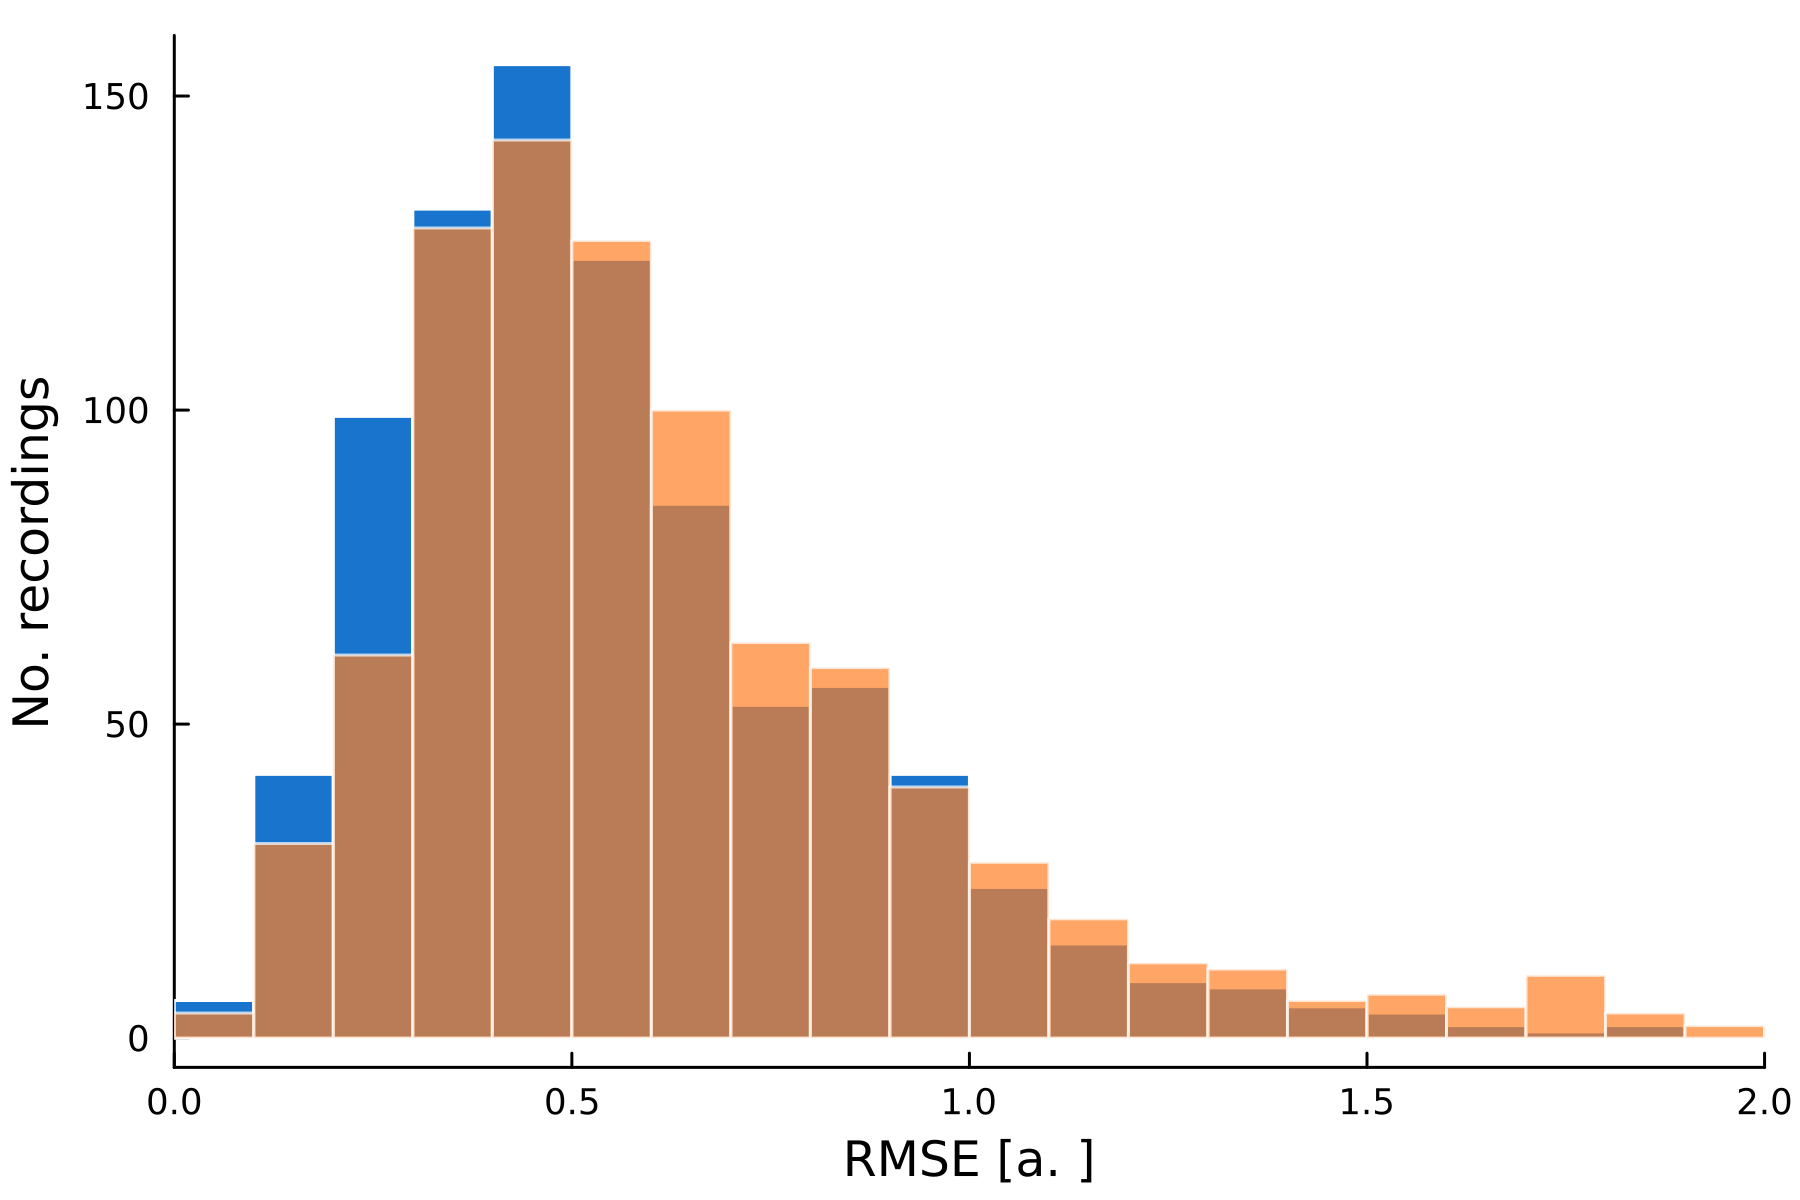

In [19]:
var_icm = res.RMSE_icm
var_icm_m = var_icm[.~isnan.(var_icm).||var_icm.<1.0]

# var_icm_m = mean(var_icm[.~isnan.(var_icm)])
# print(@sprintf("\nICM+ = %0.3f", var_icm_m))

var_bayes = res.RMSE_median
var_bayes = var_bayes[.~isnan.(var_icm)]

# var_bayes_m = mean(var_bayes[.~isnan.(var_icm)])
# print(@sprintf("Bayes = %0.3f", var_bayes_m))

histogram(var_bayes, nbins=1000, label="Bayes", xlims=[0, 2], color=:dodgerblue3, linecolor=:white)
histogram!(var_icm_m, nbins=50, alpha=.7, linecolor=:white, color=:chocolate1, xlabel="RMSE [a. ]", ylabel="No. recordings", label="Gradient descent", dpi=300, grid=false, legend=false)

# length(var_icm[.~isnan.(var_icm)])
# length(var_bayes[.~isnan.(var_bayes)])
# x = res.RMSE_icm
# mean(x[.~isnan.(x) .&& x.>0])

# savefig("/Users/jjc/Desktop/RMSE.png")


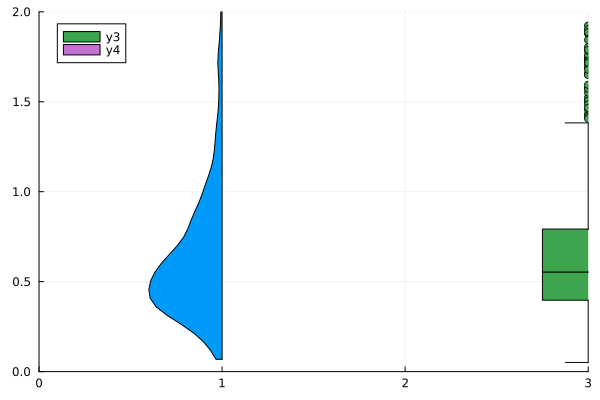

In [9]:
using HypothesisTests, CSV, Plots, StatsPlots, StatsBase, LaTeXStrings, DataFrames, OutlierDetection, KernelDensity

# X = [1]
# h = violin([1,2], [var_bayes], label=false, color=clrs[i], side=:left)
violin([var_icm_m, var_bayes], label=false, side=:left)
boxplot!([var_icm_m, var_bayes], ylims=[0,2], bar_width=.5, xlims=[0,3])


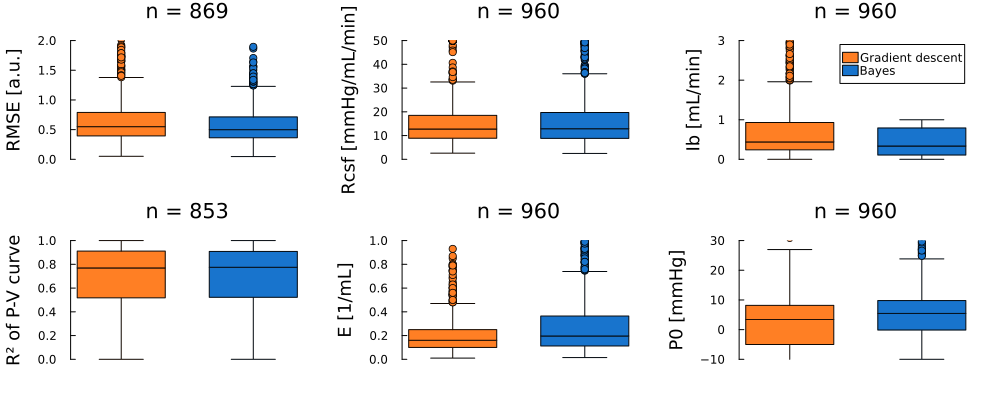

In [21]:
using Measures
# theme(:ggplot2)

var_icm = res.RMSE_icm
var_icm_m = var_icm[.~isnan.(var_icm)]
var_bayes = res.RMSE_median
var_bayes = var_bayes[.~isnan.(var_icm)]

boxplot([1], var_icm_m, bar_width=0.5, color=:chocolate1)
h1 = boxplot!([1.75], var_bayes, bar_width=0.5, ylim=[0,2], color=:dodgerblue3, xaxis=false, ylabel="RMSE [a.u.]", legend=false, grid=false)
title!(@sprintf("n = %0.0f", length(var_bayes)))
plot(h1, legend=false, grid=false, xlim=[.7, 2], size=(200,500), margin=5mm)

var_icm = res.Rcsf_icm
var_icm_m = var_icm[.~isnan.(var_icm)]
var_bayes = res.Rcsf_median
var_bayes = var_bayes[.~isnan.(var_icm)]

boxplot([1], var_icm_m, bar_width=0.5, color=:chocolate1)
h2 = boxplot!([1.75], var_bayes, bar_width=0.5, ylim=[0,50], color=:dodgerblue3, xaxis=false, ylabel="Rcsf [mmHg/mL/min]", legend=false, grid=false)
title!(@sprintf("n = %0.0f", length(var_bayes)))
plot(h2, legend=false, grid=false, xlim=[.5, 2], size=(200,500), margin=5mm)

var_icm = res.Ib_icm
var_icm_m = var_icm[.~isnan.(var_icm)]
var_bayes = res.Ib_median
var_bayes = var_bayes[.~isnan.(var_icm)]

boxplot([1], var_icm_m, bar_width=0.5, color=:chocolate1, label="Gradient descent")
h3 = boxplot!([1.75], var_bayes, bar_width=0.5, ylim=[0,3], color=:dodgerblue3, xaxis=false, ylabel="Ib [mL/min]", legend=true, grid=false, label="Bayes")
title!(@sprintf("n = %0.0f", length(var_bayes)))
plot(h3, legend=false, grid=false, xlim=[.5, 2], size=(200,500), margin=5mm)

var_icm = res.R2_icm
var_icm_m = var_icm[.~isnan.(var_icm) .&& .~isinf.(var_icm)]
var_bayes = res.R2_median
var_bayes = var_bayes[.~isnan.(var_icm)]
var_bayes = var_bayes[.~isnan.(var_bayes) .&& .~isinf.(var_bayes)]

boxplot([1], var_icm_m, bar_width=0.5, color=:chocolate1)
h4 = boxplot!([1.75], var_bayes, bar_width=0.5, ylim=[0,1], color=:dodgerblue3, xaxis=false, ylabel="R² of P-V curve", legend=false, grid=false)
title!(@sprintf("n = %0.0f", length(var_bayes)))
plot(h4, legend=false, grid=false, xlim=[.5, 2], size=(200,500), margin=5mm)

var_icm = res.E_icm
var_icm_m = var_icm[.~isnan.(var_icm) .&& .~isinf.(var_icm)]
var_bayes = res.E_median
var_bayes = var_bayes[.~isnan.(var_icm)]
var_bayes = var_bayes[.~isnan.(var_bayes) .&& .~isinf.(var_bayes)]

boxplot([1], var_icm_m, bar_width=0.5, color=:chocolate1)
h5 = boxplot!([1.75], var_bayes, bar_width=0.5, ylim=[0,1], color=:dodgerblue3, xaxis=false, ylabel="E [1/mL]", legend=false, grid=false)
title!(@sprintf("n = %0.0f", length(var_bayes)))
plot(h5, legend=false, grid=false, xlim=[.5, 2], size=(200,500), margin=5mm)

var_icm = res.P0_icm
var_icm_m = var_icm[.~isnan.(var_icm) .&& .~isinf.(var_icm)]
var_bayes = res.P0_median
var_bayes = var_bayes[.~isnan.(var_icm)]
var_bayes = var_bayes[.~isnan.(var_bayes) .&& .~isinf.(var_bayes)]

boxplot([1], var_icm_m, bar_width=0.5, color=:chocolate1, label="Old (Gradient descent)")
h6 = boxplot!([1.75], var_bayes, bar_width=0.5, ylim=[-10,30], legendlabel="New (Bayes)", color=:dodgerblue3, xaxis=false, ylabel="P0 [mmHg]", legend=false, grid=false)
title!(@sprintf("n = %0.0f", length(var_bayes)))
plot(h6, legend=false, grid=false, xlim=[.5, 2], size=(200,500), margin=5mm)

plot(h1,h2,h3,h4,h5,h6, layout=grid(2,3), margin=5mm, size=(1000, 400), labelfontsize=12)

# savefig("/Users/jjc/Desktop/all_boxplots.png")

